#Pesebaran Informasi Itaewon di Twitter

Baru - baru ini, dunia digemparkan dengan kabar berita duka dari Itaewon, Korea pada saat acara malam Halloween. Kasus ini memakan lebih dari 150 jiwa yang diasumsikan karna keadaan Itaewon pada saat itu yang sangat ramai.

## **A.Collecting Data Twitter**

Untuk mengumpulkan data twitter dengan python, kita bisa menggunakan Tweepy. Tweepy adalah Paket Python paling populer untuk mengakses API Twitter, Anda dapat membaca dokumentasi lengkapnya [DI SINI](https://tweepy.readthedocs.io/en/latest/). Dalam latihan ini, kita akan berlatih untuk mendapatkan data tweet menggunakan kata kunci tertentu dan menyimpannya sebagai file .CSV

# **A.Social Network Analysis: Itaewon**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import csv

### **Network Contruction**

In [ ]:
# Upload Local Dataset (Nodes) 
from google.colab import files
uploaded = files.upload()

Saving itaewon.csv to itaewon.csv


In [ ]:
df_tweets = pd.read_csv('itaewon.csv', sep =",")
df_tweets.head()

text  favorited  \
0  VIDEO: Seribu Lilin di Seoul untuk Korban Trag...      False   
1  RT @sitinur7821: OPEN SERVICE 🇲🇾\nDM LEBIH LAN...      False   
2  RT @sitinur7821: OPEN SERVICE 🇲🇾\nDM LEBIH LAN...      False   
3  OPEN SERVICE 🇲🇾\nDM LEBIH LANJUT AWAK💦\n#Malay...      False   
4  RT @TanyaApotekerKu: Tips jika kita berada di ...      False   

   favoriteCount replyToSN              created  truncated  replyToSID  \
0              0       NaN  2022-11-06 09:42:05       True         NaN   
1              0       NaN  2022-11-06 06:09:16      False         NaN   
2              0       NaN  2022-11-06 06:00:30      False         NaN   
3              8       NaN  2022-11-06 06:00:24       True         NaN   
4              0       NaN  2022-11-06 05:46:41      False         NaN   

                    id  replyToUID  \
0  1589191381620494337         NaN   
1  1589137823864881152         NaN   
2  1589135618483032065         NaN   
3  1589135591819837440         NaN   
4  1589132139278524419         NaN   

                                        statusSource   screenName  \
0  <a href="https://dlvrit.com/" rel="nofollow">d...  nolantv_com   
1  <a href="http://twitter.com/download/android" ...      GerfanN   
2  <a href="http://twitter.com/download/android" ...  sitinur7821   
3  <a href="http://twitter.com/download/android" ...  sitinur7821   
4  <a href="http://twitter.com/download/android" ...     yayusyru   

   retweetCount  isRetweet  retweeted  longitude  latitude  
0             0      False      False        NaN       NaN  
1             2       True      False        NaN       NaN  
2             2       True      False        NaN       NaN  
3             2      False      False        NaN       NaN  
4             2       True      False        NaN       NaN

In [ ]:
df_tweets2 = df_tweets.drop(['text','favorited', 'favoriteCount', 'created', 'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource', 'retweetCount', 'isRetweet', 'retweeted', 'longitude', 'latitude'], axis=1)
df_tweets2

replyToSN       screenName
0         NaN      nolantv_com
1         NaN          GerfanN
2         NaN      sitinur7821
3         NaN      sitinur7821
4         NaN         yayusyru
..        ...              ...
995       NaN  kuducheckoutygy
996       NaN        Abdiii_25
997       NaN      volcanolila
998       NaN  kuducheckoutygy
999       NaN    roslanramli93

[1000 rows x 2 columns]

In [ ]:
df_tweets2.rename(columns={'replyToSN': 'target', 'screenName': 'source'}, inplace=True)

In [ ]:
df_tweets2.head()

target       source
0    NaN  nolantv_com
1    NaN      GerfanN
2    NaN  sitinur7821
3    NaN  sitinur7821
4    NaN     yayusyru

**Visualize The Network**

In [ ]:
# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets2)

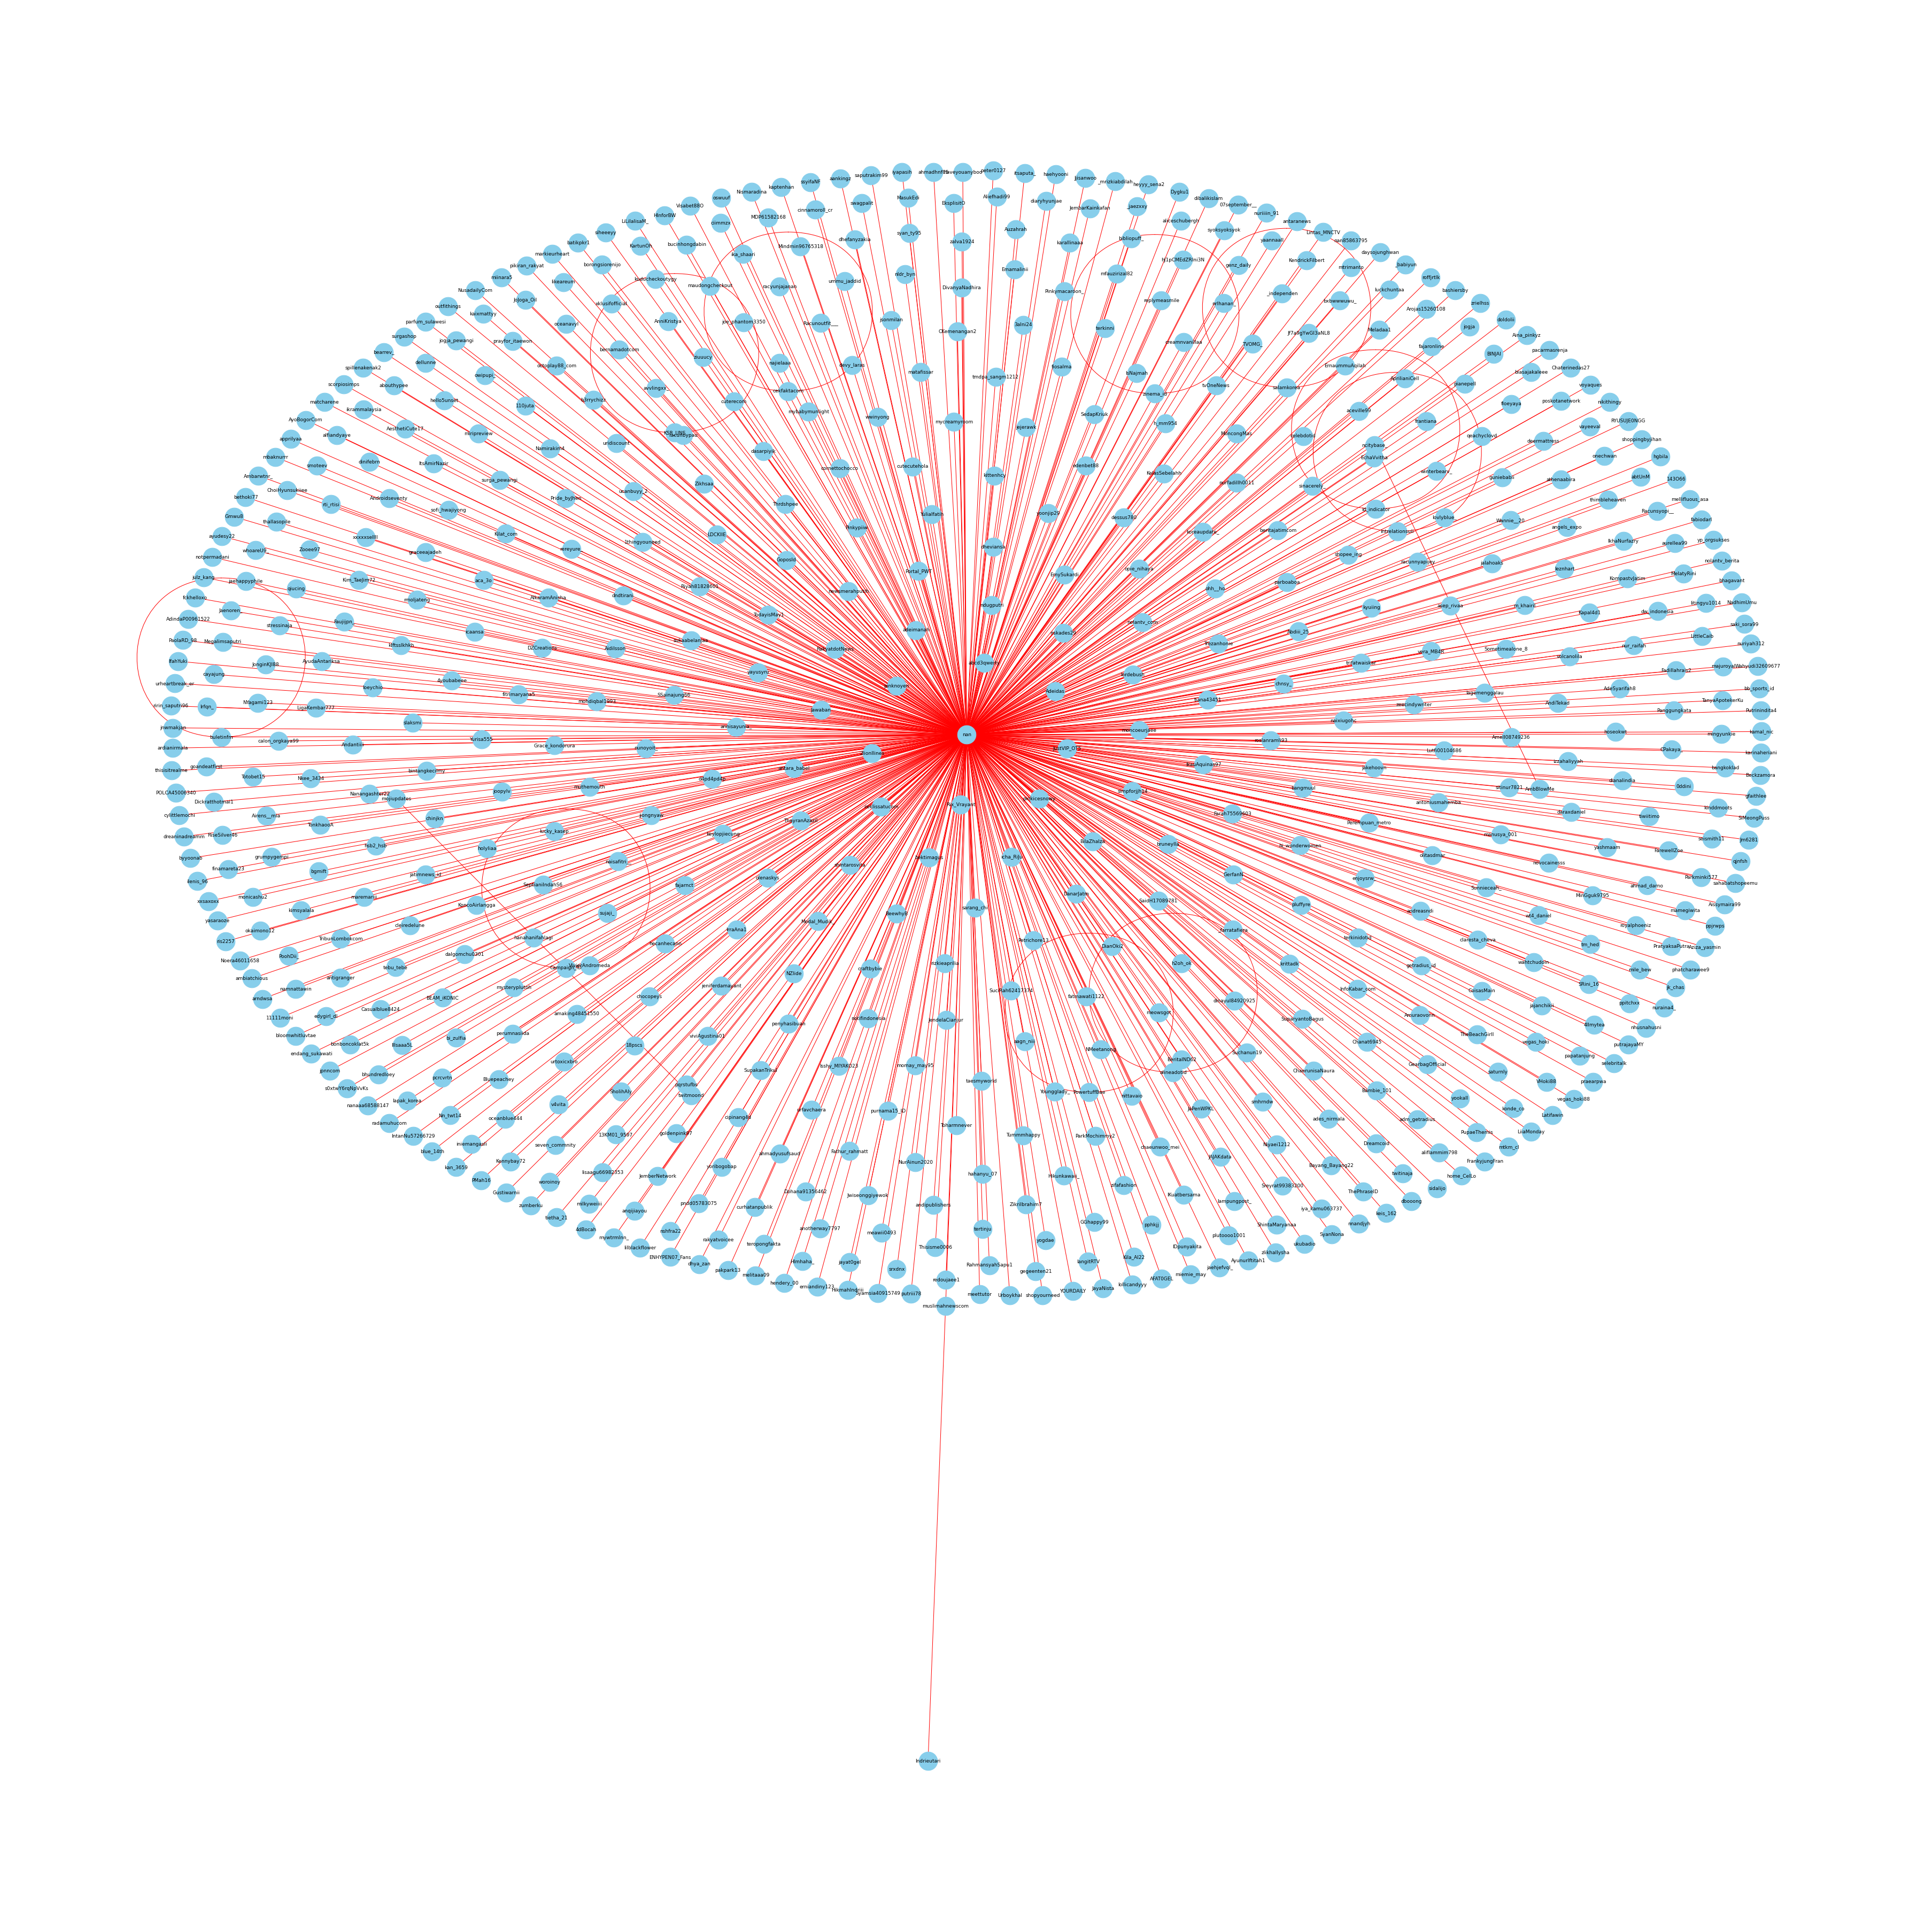

In [ ]:
# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True, 
        node_color='skyblue', node_size=1200, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G1))

### **Network Metrics and Measurement**

Centrality Measurement

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(G1)

# Sorted from the Highest
sorted(nx.degree(G1), key=lambda x: x[1], reverse=True)[0:10]

[(nan, 647),
 ('id_indicator', 3),
 ('salamkorea', 3),
 ('buletinfm', 3),
 ('intrelationsuii', 2),
 ('zinema_id', 2),
 ('muslimahnewscom', 2),
 ('cekfaktacom', 2),
 ('KSR_UNS', 2),
 ('Campaign_ID', 2)]

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G1)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G1, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.9683595389532819),
 ('muslimahnewscom', 0.002984165932540323),
 ('nolantv_com', 0.0),
 ('GerfanN', 0.0),
 ('sitinur7821', 0.0),
 ('yayusyru', 0.0),
 ('fitrimaryana5', 0.0),
 ('mohdiqbal1993', 0.0),
 ('tiwiitimo', 0.0),
 ('TanyaApotekerKu', 0.0)]

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(G1)

# Sorted from the Highest
sorted(nx.closeness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.9817929299424116),
 ('muslimahnewscom', 0.49241391926787115),
 ('nolantv_com', 0.49165402124430957),
 ('GerfanN', 0.49165402124430957),
 ('sitinur7821', 0.49165402124430957),
 ('yayusyru', 0.49165402124430957),
 ('fitrimaryana5', 0.49165402124430957),
 ('mohdiqbal1993', 0.49165402124430957),
 ('tiwiitimo', 0.49165402124430957),
 ('TanyaApotekerKu', 0.49165402124430957)]

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality_numpy(G1)

# Sorted from the Highest
sorted(nx.eigenvector_centrality_numpy(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.7070710311503717),
 ('salamkorea', 0.028932505595457035),
 ('id_indicator', 0.028932505595457028),
 ('buletinfm', 0.028932505595456997),
 ('muslimahnewscom', 0.02783817896722152),
 ('floeyaya', 0.02779516068033304),
 ('Adeidas', 0.027795160680333032),
 ('siheeeyy', 0.027795160680333032),
 ('oceanavyl', 0.027795160680333032),
 ('octoplay88_com', 0.027795160680333032)]

**Visualize Network based on Centrality Measurement**

AttributeError: ignored

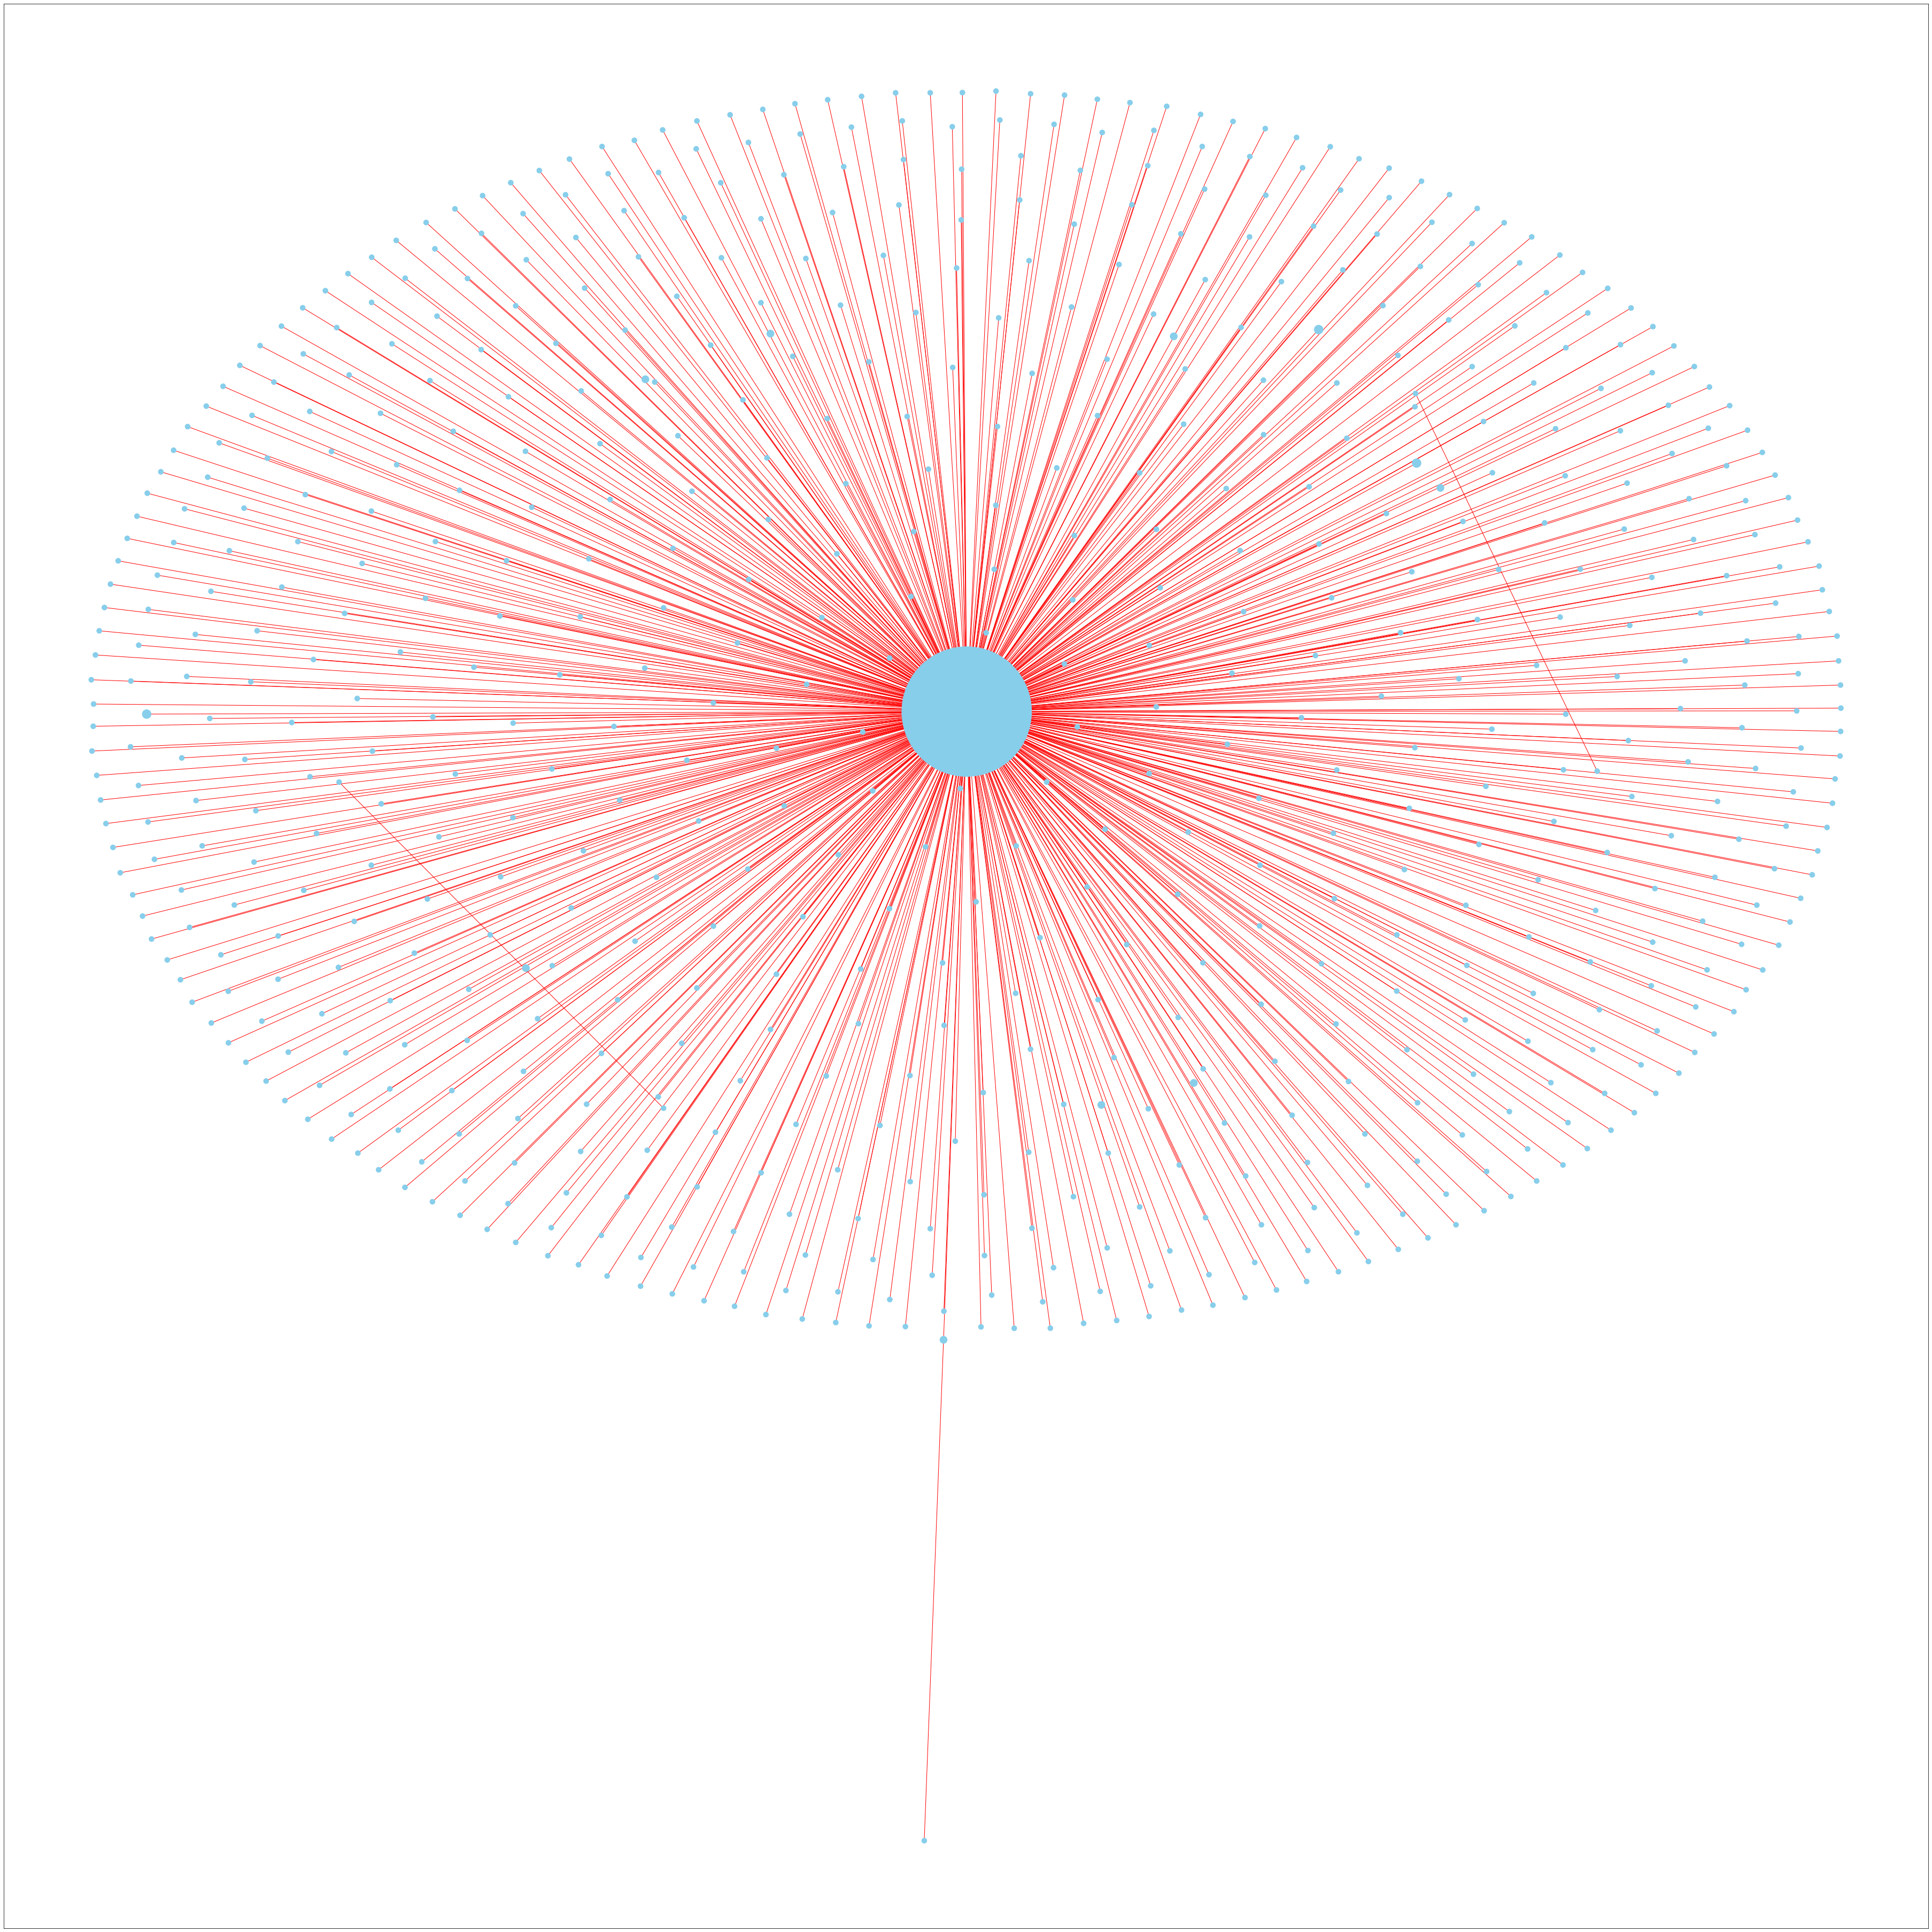

In [ ]:
# Set Degree Dictionary
d = dict(degree)

# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets2)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True, 
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 60000 for v in d.values()], 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=10,
        pos=nx.kamada_kawai_layout(G1))

**Network Topology Measurement**

In [ ]:
# Show Number of Nodes
nx.number_of_nodes(G1)

660

In [ ]:
# Show Number of Edges
nx.number_of_edges(G1)

660

In [ ]:
# Show Graph Density
nx.density(G1)

0.0030349013657056147

In [ ]:
# Show Number of Connected Component
nx.number_connected_components(G1)

10

### Community Detection

Dalam community detection, tujuannya adalah untuk membagi jaringan ke dalam daerah-daerah pada graph. Daerah tersebut biasanya sesuai dengan entitas-entitas yang memiliki
hubungan erat, dan dapat dikatakan sebagai satu komunitas

**Modularity Community**

In [ ]:
# Import Module
from networkx.algorithms.community import greedy_modularity_communities

# Modularity Community Detection
communities_m = sorted(greedy_modularity_communities(G1), key=len, reverse=True)
communities_m

TypeError: ignored